In [9]:
%matplotlib ipympl
from impedance.models.circuits import CustomCircuit
from impedance.models.circuits.elements import element
from impedance.visualization import plot_nyquist, plot_bode
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import pandas as pd
from scipy import stats

In [10]:
def give_chi_square_wt(zexp,zmodel):
     chi_sqr_wt=np.sum(np.abs((zexp-zmodel))**2/np.abs(zexp)**2)
     return chi_sqr_wt

In [11]:
# import scipy
# import numpy as np
# R_initial=100
# Q_initial=1e-2
# alpha_initial=1
# R=R_initial
# Q=Q_initial
# alpha=alpha_initial

# def give_Zuni(freq,params):
#   Z=R*1/(np.tanh(np.sqrt(R*Q*(1j*w)**alpha))*np.sqrt(R*Q*(1j*w)**alpha))
#   return Z

# def give_chi_sqr(give_Zuni,exp_data):
#   for i in 
#   return chi_sqr

In [33]:
@element(num_params=2, units=["Ohm","F"],overwrite=True)
def TLMuni(p, f):
    omega = 2 * np.pi * np.array(f)
    Rion, Q = p[0], p[1]
    S=Rion*Q*(1j*omega)**0.86
    Z= Rion*np.sqrt(1/(S))*(1/(np.tanh(np.sqrt(S))))
    return Z

In [34]:
exp_data=pd.read_excel("abhi experimental through plane data.xlsx",sheet_name="Cal",header=None)
exp_data=exp_data.to_numpy()
z_exp=exp_data[:,1]+1j*exp_data[:,2]
freq_exp_data=exp_data[:,0]


In [35]:
wt="mod"
itrR=0
itrQ=0
chi_sqr=np.zeros((30,30))
for R in np.linspace(100,1000,30):
    for Q in np.linspace(1e-6,1e-2,30):
        c_model=CustomCircuit(initial_guess=[R,Q],circuit="TLMuni")
        z_model=c_model.predict(frequencies=freq_exp_data)
        chi_sqr[itrR,itrQ]=give_chi_square_wt(z_exp,z_model)
        itrQ=itrQ+1
    itrQ=0
    itrR=itrR+1


C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\impedance\models\circuits\circuits.py:145: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")
C:\Users\admin\AppData\Local\Temp\ipykernel_33096\460625050.py:6: RuntimeWarning: overflow encountered in tanh
  Z= Rion*np.sqrt(1/(S))*(1/(np.tanh(np.sqrt(S))))


C:\Users\admin\AppData\Local\Temp\ipykernel_33096\2408774516.py:11: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,0.1)


(100.0, 0.1)

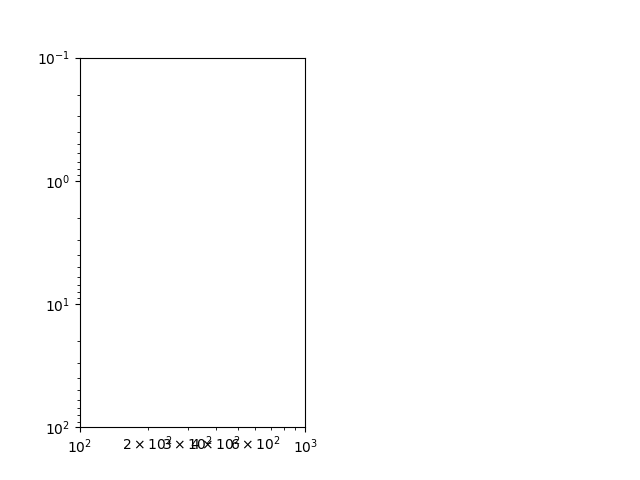

In [38]:
#print(chi_sqr)
fig=plt.figure()
ax = fig.add_subplot(1, 2, 1)
R, Q = np.meshgrid(np.linspace(100,1000,30), np.linspace(1e-6,1e-2,30))
#ax.plot_surface(R,Q,chi_sqr)
CS=ax.contour(R,Q,chi_sqr)
ax.clabel(CS, CS.levels, inline=True, fontsize=10)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(100,150)
ax.set_ylim(0,0.1)




In [23]:
delta = 0.5
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2
Z

array([[ 4.52063104e-06,  7.07138206e-05,  6.70894796e-04,
         3.86043180e-03,  1.34713733e-02,  2.85024532e-02,
         3.65404779e-02,  2.83362445e-02,  1.32290744e-02,
         3.66868497e-03,  5.80125396e-04,  4.47004064e-05],
       [ 2.60141608e-05,  4.06918263e-04,  3.86043180e-03,
         2.22105398e-02,  7.74777007e-02,  1.63763061e-01,
         2.09378100e-01,  1.61163119e-01,  7.36875074e-02,
         1.92111147e-02,  2.44055949e-03,  0.00000000e+00],
       [ 9.07957372e-05,  1.42017349e-03,  1.34713733e-02,
         7.74777007e-02,  2.69999641e-01,  5.69148685e-01,
         7.22282988e-01,  5.44481126e-01,  2.34039289e-01,
         4.90199478e-02,  0.00000000e+00, -2.44055949e-03],
       [ 1.92199582e-04,  3.00586969e-03,  2.85024532e-02,
         1.63763061e-01,  5.69148685e-01,  1.19084333e+00,
         1.48005315e+00,  1.04889132e+00,  3.62211145e-01,
         0.00000000e+00, -4.90199478e-02, -1.92111147e-02],
       [ 2.46736809e-04,  3.85738758e-03,  3.6540477